In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.4     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "dengai-dataset"

In [2]:
feature_data<-read.csv(file = "../input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv", header=T)

case_data<-read.csv(file = "../input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv", header=T)

In [3]:
head(feature_data)
head(case_data)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,⋯,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,sj,1990,18,1990-04-30,0.1226000,0.1037250,0.1984833,0.1776167,12.42,297.5729,⋯,32.00,73.36571,12.42,14.01286,2.628571,25.44286,6.900000,29.4,20.0,16.0
2,sj,1990,19,1990-05-07,0.1699000,0.1421750,0.1623571,0.1554857,22.82,298.2114,⋯,17.94,77.36857,22.82,15.37286,2.371429,26.71429,6.371429,31.7,22.2,8.6
3,sj,1990,20,1990-05-14,0.0322500,0.1729667,0.1572000,0.1708429,34.54,298.7814,⋯,26.10,82.05286,34.54,16.84857,2.300000,26.71429,6.485714,32.2,22.8,41.4
4,sj,1990,21,1990-05-21,0.1286333,0.2450667,0.2275571,0.2358857,15.36,298.9871,⋯,13.90,80.33714,15.36,16.67286,2.428571,27.47143,6.771429,33.3,23.3,4.0
5,sj,1990,22,1990-05-28,0.1962000,0.2622000,0.2512000,0.2473400,7.52,299.5186,⋯,12.20,80.46000,7.52,17.21000,3.014286,28.94286,9.371429,35.0,23.9,5.8
6,sj,1990,23,1990-06-04,NA,0.1748500,0.2543143,0.1817429,9.58,299.6300,⋯,26.49,79.89143,9.58,17.21286,2.100000,28.11429,6.942857,34.4,23.9,39.1


,city,year,weekofyear,total_cases
,<fct>,<int>,<int>,<int>
1,sj,1990,18,4
2,sj,1990,19,5
3,sj,1990,20,4
4,sj,1990,21,3
5,sj,1990,22,6
6,sj,1990,23,2


In [4]:
feature_data$yearweek<- paste(feature_data$year,feature_data$weekofyear)
feature_data$week_start_date<- as.Date(feature_data$week_start_date, "%Y-%m-%d ")
case_data$yearweek<- paste(case_data$year,case_data$weekofyear)

In [5]:
library(dplyr)
training_data<-left_join(feature_data, case_data[,c(1,4,5)], by = c("city","yearweek"))

In [6]:
head(training_data)
dim(training_data)
summary(training_data)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,⋯,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,yearweek,total_cases
,<fct>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,sj,1990,18,1990-04-30,0.1226000,0.1037250,0.1984833,0.1776167,12.42,297.5729,⋯,12.42,14.01286,2.628571,25.44286,6.900000,29.4,20.0,16.0,1990 18,4
2,sj,1990,19,1990-05-07,0.1699000,0.1421750,0.1623571,0.1554857,22.82,298.2114,⋯,22.82,15.37286,2.371429,26.71429,6.371429,31.7,22.2,8.6,1990 19,5
3,sj,1990,20,1990-05-14,0.0322500,0.1729667,0.1572000,0.1708429,34.54,298.7814,⋯,34.54,16.84857,2.300000,26.71429,6.485714,32.2,22.8,41.4,1990 20,4
4,sj,1990,21,1990-05-21,0.1286333,0.2450667,0.2275571,0.2358857,15.36,298.9871,⋯,15.36,16.67286,2.428571,27.47143,6.771429,33.3,23.3,4.0,1990 21,3
5,sj,1990,22,1990-05-28,0.1962000,0.2622000,0.2512000,0.2473400,7.52,299.5186,⋯,7.52,17.21000,3.014286,28.94286,9.371429,35.0,23.9,5.8,1990 22,6
6,sj,1990,23,1990-06-04,NA,0.1748500,0.2543143,0.1817429,9.58,299.6300,⋯,9.58,17.21286,2.100000,28.11429,6.942857,34.4,23.9,39.1,1990 23,2


[1] 1456   26

 city          year        weekofyear    week_start_date     
 iq:520   Min.   :1990   Min.   : 1.00   Min.   :1990-04-30  
 sj:936   1st Qu.:1997   1st Qu.:13.75   1st Qu.:1997-04-28  
          Median :2002   Median :26.50   Median :2002-05-28  
          Mean   :2001   Mean   :26.50   Mean   :2001-07-09  
          3rd Qu.:2005   3rd Qu.:39.25   3rd Qu.:2005-11-26  
          Max.   :2010   Max.   :53.00   Max.   :2010-06-25  
                                                             
    ndvi_ne            ndvi_nw            ndvi_se            ndvi_sw        
 Min.   :-0.40625   Min.   :-0.45610   Min.   :-0.01553   Min.   :-0.06346  
 1st Qu.: 0.04495   1st Qu.: 0.04922   1st Qu.: 0.15509   1st Qu.: 0.14421  
 Median : 0.12882   Median : 0.12143   Median : 0.19605   Median : 0.18945  
 Mean   : 0.14229   Mean   : 0.13055   Mean   : 0.20378   Mean   : 0.20231  
 3rd Qu.: 0.24848   3rd Qu.: 0.21660   3rd Qu.: 0.24885   3rd Qu.: 0.24698  
 Max.   : 0.50836   Max.   : 0.45443   Max

In [7]:
#training_data%>%filter(week_start_date =='2000-07-01')

In [8]:
#Sj
sj_training_data<-training_data%>%filter(city =='sj')
head(sj_training_data)
summary(sj_training_data)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,⋯,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,yearweek,total_cases
,<fct>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,sj,1990,18,1990-04-30,0.1226000,0.1037250,0.1984833,0.1776167,12.42,297.5729,⋯,12.42,14.01286,2.628571,25.44286,6.900000,29.4,20.0,16.0,1990 18,4
2,sj,1990,19,1990-05-07,0.1699000,0.1421750,0.1623571,0.1554857,22.82,298.2114,⋯,22.82,15.37286,2.371429,26.71429,6.371429,31.7,22.2,8.6,1990 19,5
3,sj,1990,20,1990-05-14,0.0322500,0.1729667,0.1572000,0.1708429,34.54,298.7814,⋯,34.54,16.84857,2.300000,26.71429,6.485714,32.2,22.8,41.4,1990 20,4
4,sj,1990,21,1990-05-21,0.1286333,0.2450667,0.2275571,0.2358857,15.36,298.9871,⋯,15.36,16.67286,2.428571,27.47143,6.771429,33.3,23.3,4.0,1990 21,3
5,sj,1990,22,1990-05-28,0.1962000,0.2622000,0.2512000,0.2473400,7.52,299.5186,⋯,7.52,17.21000,3.014286,28.94286,9.371429,35.0,23.9,5.8,1990 22,6
6,sj,1990,23,1990-06-04,NA,0.1748500,0.2543143,0.1817429,9.58,299.6300,⋯,9.58,17.21286,2.100000,28.11429,6.942857,34.4,23.9,39.1,1990 23,2


 city          year        weekofyear    week_start_date     
 iq:  0   Min.   :1990   Min.   : 1.00   Min.   :1990-04-30  
 sj:936   1st Qu.:1994   1st Qu.:13.75   1st Qu.:1994-10-27  
          Median :1999   Median :26.50   Median :1999-04-26  
          Mean   :1999   Mean   :26.50   Mean   :1999-04-26  
          3rd Qu.:2003   3rd Qu.:39.25   3rd Qu.:2003-10-23  
          Max.   :2008   Max.   :53.00   Max.   :2008-04-22  
                                                             
    ndvi_ne            ndvi_nw            ndvi_se            ndvi_sw        
 Min.   :-0.40625   Min.   :-0.45610   Min.   :-0.01553   Min.   :-0.06346  
 1st Qu.: 0.00450   1st Qu.: 0.01642   1st Qu.: 0.13928   1st Qu.: 0.12916  
 Median : 0.05770   Median : 0.06808   Median : 0.17719   Median : 0.16597  
 Mean   : 0.05792   Mean   : 0.06747   Mean   : 0.17766   Mean   : 0.16596  
 3rd Qu.: 0.11110   3rd Qu.: 0.11520   3rd Qu.: 0.21256   3rd Qu.: 0.20277  
 Max.   : 0.49340   Max.   : 0.43710   Max

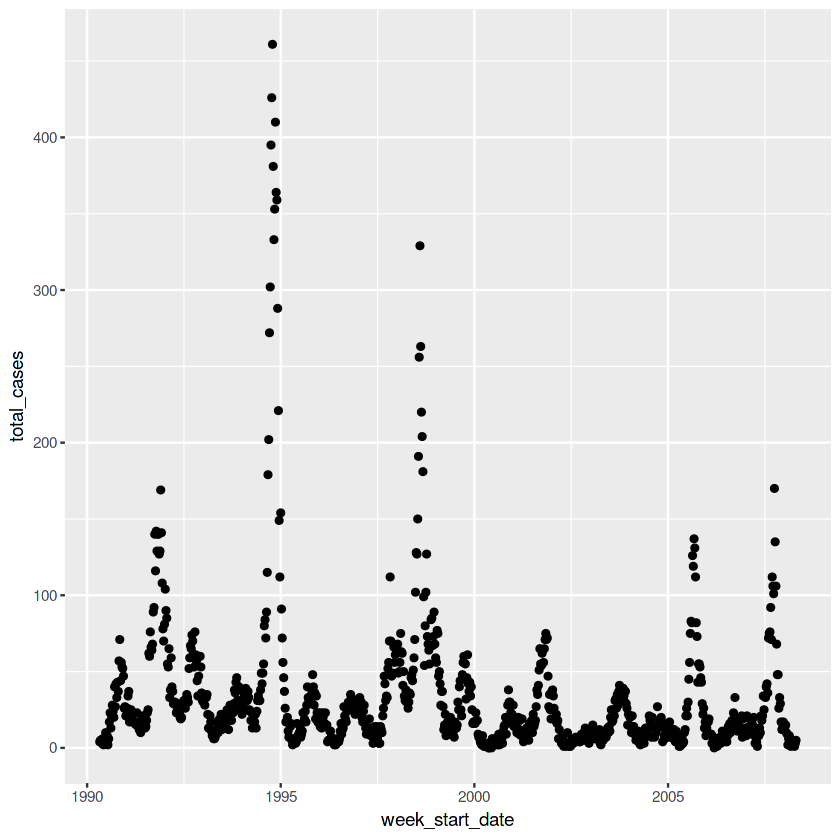

In [9]:
library(ggplot2)
qplot(week_start_date,total_cases, data= sj_training_data)

In [10]:
sj_train_data<-sj_training_data[,c(4,26)]
colnames(sj_train_data)<-c("ds","y")
tail(sj_train_data)

library(prophet)

sj_m<- prophet(sj_train_data,yearly.seasonality= TRUE, weekly.seasonality = TRUE,seasonality.mode = 'multiplicative')

sj_future<- make_future_dataframe(sj_m,freq="week",periods=260)
sj_forecast<-predict(sj_m,sj_future)

,ds,y
,<date>,<int>
931,2008-03-18,3
932,2008-03-25,4
933,2008-04-01,3
934,2008-04-08,1
935,2008-04-15,3
936,2008-04-22,5


Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, as_function, flatten, flatten_chr, flatten_dbl, flatten_int,
    flatten_lgl, flatten_raw, invoke, list_along, modify, prepend,
    splice


Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



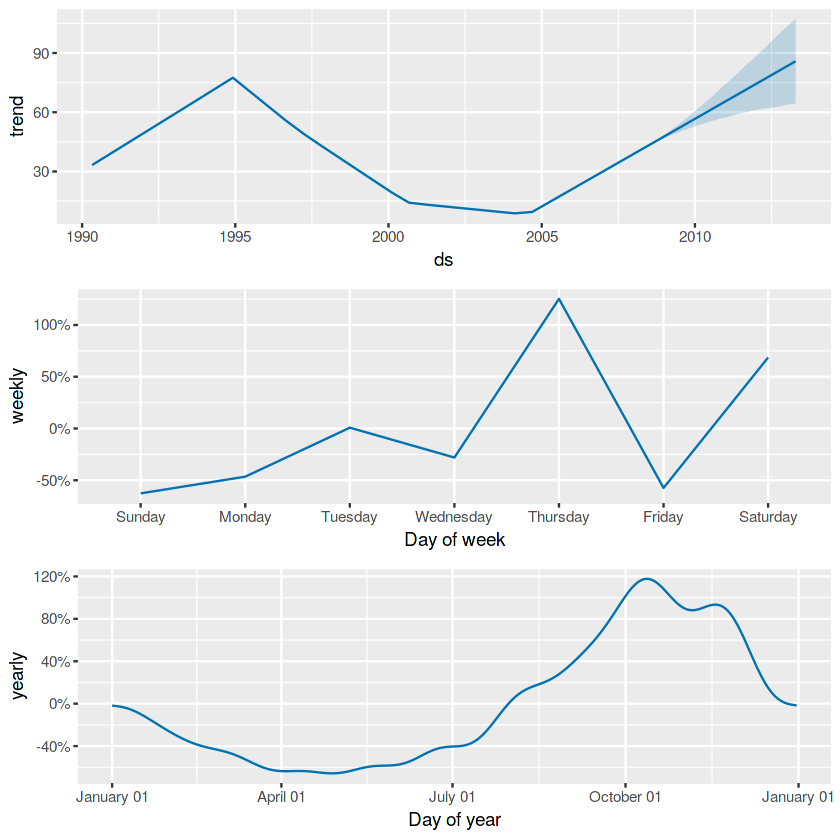

In [11]:
prophet_plot_components(sj_m, sj_forecast)

In [12]:
sj_test_forecast<- data.frame("sj",sj_forecast$ds, sj_forecast$yhat)
dim(sj_test_forecast)
sj_predicted<-sj_test_forecast[937:1196,]
colnames(sj_predicted)<-c("city","ds","total_cases")
tail(sj_predicted)

dim(sj_predicted)

[1] 1196    3

,city,ds,total_cases
,<fct>,<dttm>,<dbl>
1191,sj,2013-03-12,41.57220
1192,sj,2013-03-19,36.63751
1193,sj,2013-03-26,32.98334
1194,sj,2013-04-02,31.75473
1195,sj,2013-04-09,31.92848
1196,sj,2013-04-16,31.64800


[1] 260   3

In [13]:
#IQ
iq_training_data<-training_data%>%filter(city =='iq')
head(iq_training_data)
summary(iq_training_data)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,⋯,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,yearweek,total_cases
,<fct>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,iq,2000,26,2000-07-01,0.1928857,0.1322571,0.3408857,0.2472000,25.41,296.7400,⋯,25.41,16.65143,8.928571,26.40000,10.77500,32.5,20.7,3.0,2000 26,0
2,iq,2000,27,2000-07-08,0.2168333,0.2761000,0.2894571,0.2416571,60.61,296.6343,⋯,60.61,16.86286,10.314286,26.90000,11.56667,34.0,20.8,55.6,2000 27,0
3,iq,2000,28,2000-07-15,0.1767571,0.1731286,0.2041143,0.1280143,55.52,296.4157,⋯,55.52,17.12000,7.385714,26.80000,11.46667,33.0,20.7,38.1,2000 28,0
4,iq,2000,29,2000-07-22,0.2277286,0.1454286,0.2542000,0.2003143,5.60,295.3571,⋯,5.60,14.43143,9.114286,25.76667,10.53333,31.5,14.7,30.0,2000 29,0
5,iq,2000,30,2000-07-29,0.3286429,0.3221286,0.2543714,0.3610429,62.76,296.4329,⋯,62.76,15.44429,9.500000,26.60000,11.48000,33.3,19.1,4.0,2000 30,0
6,iq,2000,31,2000-08-05,0.2055286,0.1907571,0.2316714,0.2553143,16.24,297.1914,⋯,16.24,13.42143,13.771429,25.34000,10.94000,32.0,17.0,11.5,2000 31,0


 city          year        weekofyear    week_start_date         ndvi_ne       
 iq:520   Min.   :2000   Min.   : 1.00   Min.   :2000-07-01   Min.   :0.06173  
 sj:  0   1st Qu.:2003   1st Qu.:13.75   1st Qu.:2002-12-30   1st Qu.:0.20000  
          Median :2005   Median :26.50   Median :2005-06-28   Median :0.26364  
          Mean   :2005   Mean   :26.50   Mean   :2005-06-28   Mean   :0.26387  
          3rd Qu.:2007   3rd Qu.:39.25   3rd Qu.:2007-12-26   3rd Qu.:0.31997  
          Max.   :2010   Max.   :53.00   Max.   :2010-06-25   Max.   :0.50836  
                                                              NA's   :3        
    ndvi_nw           ndvi_se           ndvi_sw        precipitation_amt_mm
 Min.   :0.03586   Min.   :0.02988   Min.   :0.06418   Min.   :  0.00      
 1st Qu.:0.17954   1st Qu.:0.19474   1st Qu.:0.20413   1st Qu.: 39.10      
 Median :0.23297   Median :0.24980   Median :0.26214   Median : 60.47      
 Mean   :0.23878   Mean   :0.25013   Mean   :0.26678   M

In [14]:
iq_train_data<-iq_training_data[,c(4,26)]
colnames(iq_train_data)<-c("ds","y")
tail(iq_train_data)

library(prophet)
iq_m<- prophet(iq_train_data,yearly.seasonality= TRUE,weekly.seasonality = TRUE,seasonality.mode = 'multiplicative')

iq_future<- make_future_dataframe(iq_m,freq="week",periods=156)
iq_forecast<-predict(iq_m,iq_future)
tail(iq_forecast)

,ds,y
,<date>,<int>
515,2010-05-21,6
516,2010-05-28,5
517,2010-06-04,8
518,2010-06-11,1
519,2010-06-18,1
520,2010-06-25,4


Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



,ds,trend,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat_lower,yhat_upper,trend_lower,trend_upper,yhat
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
671,2013-05-17,0.9527085,-0.1832091,-0.1832091,-0.1832091,0.2494069,0.2494069,0.2494069,-0.4326161,-0.4326161,-0.4326161,0,0,0,-10.108786,11.77188,-0.2739486,2.086068,0.7781636
672,2013-05-24,0.9274500,-0.2508089,-0.2508089,-0.2508089,0.2494069,0.2494069,0.2494069,-0.5002159,-0.5002159,-0.5002159,0,0,0,-9.591922,11.28324,-0.3127543,2.070789,0.6948372
673,2013-05-31,0.9021915,-0.2431732,-0.2431732,-0.2431732,0.2494069,0.2494069,0.2494069,-0.4925801,-0.4925801,-0.4925801,0,0,0,-10.047501,11.33364,-0.3502284,2.054198,0.6828027
674,2013-06-07,0.8769329,-0.2258128,-0.2258128,-0.2258128,0.2494069,0.2494069,0.2494069,-0.4752198,-0.4752198,-0.4752198,0,0,0,-10.502984,11.53779,-0.3877971,2.039617,0.6789102
675,2013-06-14,0.8516744,-0.2812099,-0.2812099,-0.2812099,0.2494069,0.2494069,0.2494069,-0.5306169,-0.5306169,-0.5306169,0,0,0,-10.409073,11.63024,-0.4284220,2.028072,0.6121751
676,2013-06-21,0.8264159,-0.3822706,-0.3822706,-0.3822706,0.2494069,0.2494069,0.2494069,-0.6316776,-0.6316776,-0.6316776,0,0,0,-10.826853,10.08703,-0.4626506,2.017175,0.5105014


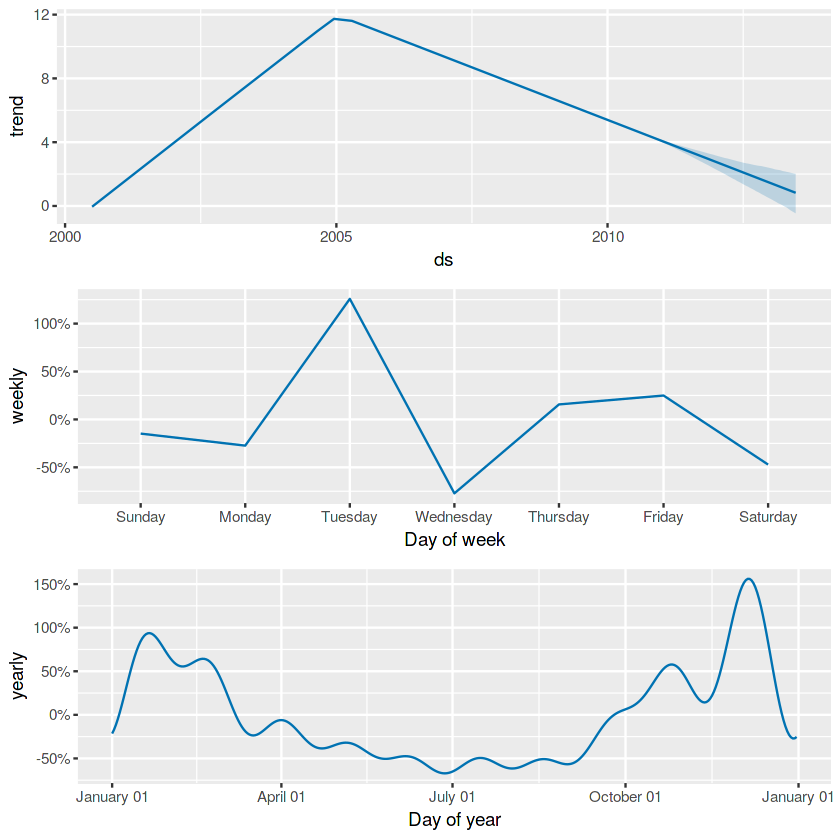

In [15]:
prophet_plot_components(iq_m, iq_forecast)

In [16]:
iq_test_forecast<- data.frame("iq",iq_forecast$ds, iq_forecast$yhat)
dim(iq_test_forecast)
iq_predicted<-iq_test_forecast[521:676,]
colnames(iq_predicted)<-c("city","ds","total_cases")
tail(iq_predicted)

dim(iq_predicted)


[1] 676   3

,city,ds,total_cases
,<fct>,<dttm>,<dbl>
671,iq,2013-05-17,0.7781636
672,iq,2013-05-24,0.6948372
673,iq,2013-05-31,0.6828027
674,iq,2013-06-07,0.6789102
675,iq,2013-06-14,0.6121751
676,iq,2013-06-21,0.5105014


[1] 156   3

In [17]:
result<-rbind(sj_predicted,iq_predicted)
head(result)
dim(result)

,city,ds,total_cases
,<fct>,<dttm>,<dbl>
937,sj,2008-04-29,14.66825
938,sj,2008-05-06,15.42264
939,sj,2008-05-13,16.76437
940,sj,2008-05-20,17.71206
941,sj,2008-05-27,18.00730
942,sj,2008-06-03,18.61158


[1] 416   3

In [18]:
write.csv(result, file = 'result.csv')